## Automobile_insurance_fraud_dataset

I have collected this dataset from the github link(https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects).This datset has the information that the insurance done on the automobile is fraud or not.

Importing numpy and pandas for data operations,matplotlib and seaborn for visualization process and sklearn libraries modules for data shaping and metrics evaluation.

In [1]:
#importing the required libraries and metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

#importing warnings to suppress while execution
import warnings
warnings.filterwarnings('ignore')

In [2]:
#accesing the datasets from the file folder
c=pd.read_csv('C:/Users/hp/Downloads/Data-Science-ML-Capstone-Projects-master/Automobile_insurance_fraud.csv')
fraud=pd.DataFrame(c)
#take a look for the structure of the data
fraud.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
#lets check for the unique value counts for each column
for col in fraud.columns:
    print(fraud[col].value_counts())

194    8
285    7
140    7
230    7
128    7
      ..
347    1
113    1
337    1
117    1
0      1
Name: months_as_customer, Length: 391, dtype: int64
43    49
39    48
41    45
34    44
30    42
31    42
38    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
36    32
42    32
44    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
25    14
49    14
55    14
50    13
53    13
61    10
24    10
54    10
60     9
51     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
22     1
20     1
19     1
Name: age, dtype: int64
116735    1
107181    1
430794    1
115399    1
328387    1
         ..
218456    1
179538    1
357713    1
247116    1
296960    1
Name: policy_number, Length: 1000, dtype: int64
01-01-2006    3
28-04-1992    3
05-08-1992    3
07-07-1996    2
22-08-1991    2
             ..
14-01-2005    1
17-09-1994    1
13-11-2014    1
16-05-2001    1
27-02-1994    1
Name: policy_bind_date, Length: 951, dtype: int64
OH   

from the value_counts,we get lot of information such as unnecessary columns,categorical columns and date columns,so lets start with dropping the unnecessary one s and then furthur operations.

In [4]:
fraud.drop(['policy_number','_c39','incident_location'],axis=1,inplace=True)

In [5]:
fraud.dtypes

months_as_customer               int64
age                              int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage          

we have two columns describe dates but in the object datatype,so i am going to retreive main info from them rather than changing its datatype

In [6]:
fraud['policy_bind_date']

0      17-10-2014
1      27-06-2006
2      06-09-2000
3      25-05-1990
4      06-06-2014
          ...    
995    16-07-1991
996    05-01-2014
997    17-02-2003
998    18-11-2011
999    11-11-1996
Name: policy_bind_date, Length: 1000, dtype: object

In [7]:
fraud['policy_bind_day']=fraud['policy_bind_date'].str.split('-').str[0].astype(int)
fraud['policy_bind_month']=fraud['policy_bind_date'].str.split('-').str[1].astype(int)
fraud['policy_bind_year']=fraud['policy_bind_date'].str.split('-').str[2].astype(int)

In [8]:
fraud['incident_date']

0      25-01-2015
1      21-01-2015
2      22-02-2015
3      10-01-2015
4      17-02-2015
          ...    
995    22-02-2015
996    24-01-2015
997    23-01-2015
998    26-02-2015
999    26-02-2015
Name: incident_date, Length: 1000, dtype: object

In [9]:
fraud['incident_day']=fraud['incident_date'].str.split('-').str[0].astype(int)
fraud['incident_month']=fraud['incident_date'].str.split('-').str[1].astype(int)
fraud['incident_year']=fraud['incident_date'].str.split('-').str[2].astype(int)

Now lets drop these columns describing date

In [10]:
fraud.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [11]:
for col in fraud.columns:
    if fraud[col].dtypes==object:
        print(fraud[col].value_counts())

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
reading           64
paintball         57
exercise          57
bungie-jumping    56
camping           55
golf              55
movies            55
kayaking          54
yachting          53
hiking            52
video-games       50
base-jumping   

Converting categorical columns to labels using LabelEncoder

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in fraud.columns:
    if fraud[col].dtypes==object:
        fraud[col]=le.fit_transform(fraud[col].astype(str))

In [13]:
#lets see the structure now
fraud.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year
0,328,48,2,1,1000,1406.91,0,466132,1,4,...,10,1,2004,1,17,10,2014,25,1,2015
1,228,42,1,1,2000,1197.22,5000000,468176,1,4,...,8,12,2007,1,27,6,2006,21,1,2015
2,134,29,2,0,2000,1413.14,5000000,430632,0,6,...,4,30,2007,0,6,9,2000,22,2,2015
3,256,41,0,1,2000,1415.74,6000000,608117,0,6,...,3,34,2014,1,25,5,1990,10,1,2015
4,228,44,0,2,1000,1583.91,6000000,610706,1,0,...,0,31,2009,0,6,6,2014,17,2,2015


In [14]:
fraud.shape

(1000, 41)

In [15]:
fraud['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

Data Visualization

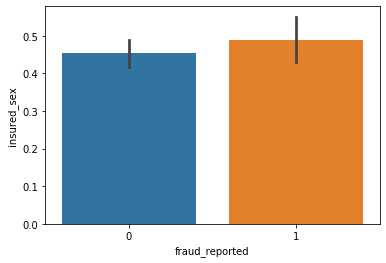

In [16]:
sns.barplot(x='fraud_reported',y='insured_sex',data=fraud)

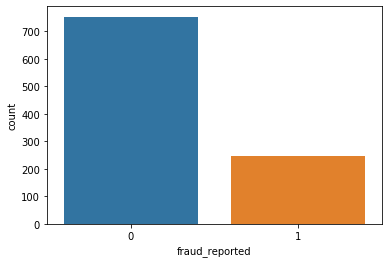

In [17]:
sns.countplot(fraud['fraud_reported'])

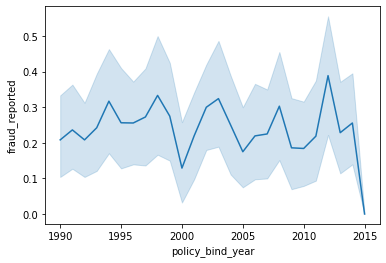

In [18]:
sns.lineplot(x='policy_bind_year',y='fraud_reported',data=fraud)

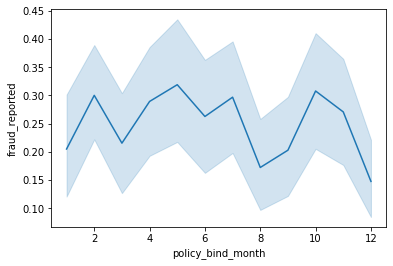

In [19]:
sns.lineplot(x='policy_bind_month',y='fraud_reported',data=fraud)

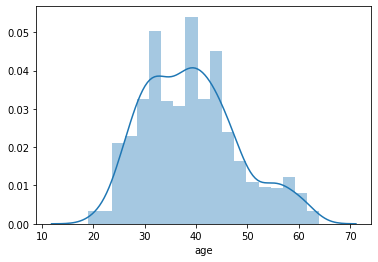

In [20]:
sns.distplot(fraud['age'])

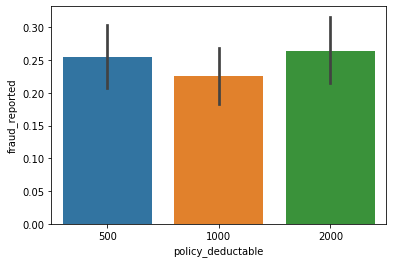

In [21]:
#barplot for policy_deducted as compared to fraud reported
sns.barplot(x='policy_deductable',y='fraud_reported',data=fraud)

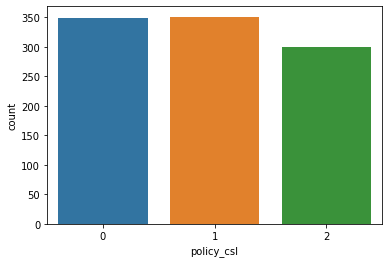

In [22]:
sns.countplot(fraud['policy_csl'])

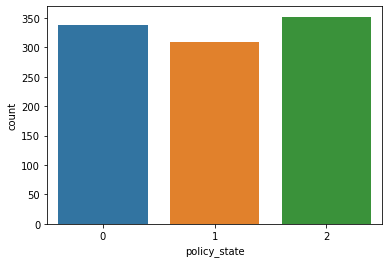

In [23]:
#getting the counts for each policy state
sns.countplot(fraud['policy_state'])

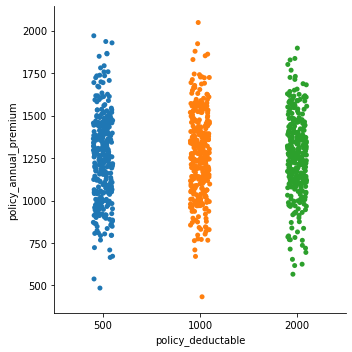

In [24]:
#plotting of catplot b/w policy deducted vs policy_aanual_premium
sns.catplot(x='policy_deductable',y='policy_annual_premium',data=fraud)

Getting the statistical summary of the data

In [25]:
fraud.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,203.954000,38.948000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,2.966000,...,6.546000,19.318000,2005.103000,0.247000,15.448000,6.559000,2001.604000,14.995000,1.496000,2015.0
std,115.113174,9.140287,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,1.948497,...,4.034869,11.136107,6.015861,0.431483,8.808001,3.499824,7.360391,8.670995,0.523697,0.0
min,0.000000,19.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,0.000000,...,0.000000,0.000000,1995.000000,0.000000,1.000000,1.000000,1990.000000,1.000000,1.000000,2015.0
25%,115.750000,32.000000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,1.000000,...,3.000000,10.000000,2000.000000,0.000000,8.000000,3.000000,1995.000000,7.750000,1.000000,2015.0
50%,199.500000,38.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,3.000000,...,7.000000,20.000000,2005.000000,0.000000,16.000000,7.000000,2002.000000,15.000000,1.000000,2015.0
75%,276.250000,44.000000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,5.000000,...,10.000000,29.000000,2010.000000,0.000000,23.000000,10.000000,2008.000000,22.000000,2.000000,2015.0
max,479.000000,64.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,6.000000,...,13.000000,38.000000,2015.000000,1.000000,31.000000,12.000000,2015.000000,31.000000,3.000000,2015.0


In most of the column,we have mean and median value is in range,some of the column need to be scaled.

In [26]:
#lets drop the date attributes now
fraud.drop(['policy_bind_day','policy_bind_month','policy_bind_year','incident_day','incident_month','incident_year','incident_hour_of_the_day','auto_year'],axis=1,inplace=True)

In [27]:
#lets see correlation among the data
fraud.corr()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,-0.000833,...,-0.010162,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,0.020544
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,0.000969,...,-0.015679,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.012143
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,-0.034327,...,0.013384,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.029432
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,0.009153,...,-0.000595,0.071500,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.037190
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,0.015217,...,-0.022765,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.014817
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,-0.019715,...,0.026780,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.014480
umbrella_limit,0.015498,0.018126,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,-0.019357,...,0.022743,-0.006738,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.058622
insured_zip,0.017895,0.025604,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,0.016079,...,0.028695,0.019805,-0.017607,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,0.019368
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.009733,0.038853,0.010688,-0.036942,1.000000,0.009002,...,-0.020297,0.042463,0.020864,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,0.030873
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.015217,-0.019715,-0.019357,0.016079,0.009002,1.000000,...,-0.012072,0.019211,0.036141,0.074226,0.081880,0.055794,0.068348,0.055202,0.049445,0.008808


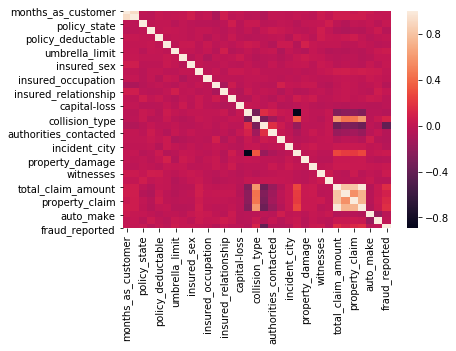

In [28]:
#plotting the correlation using heatmap
sns.heatmap(fraud.corr())
#heatmap for correlation shows the most of the data we have has correlation is in the range of 0 to 0.5 

shaping the data for machine learning

In [29]:
#seperating input and target variables
def_x=fraud.iloc[:,:-1]
y=fraud.iloc[:,-1]

Scaling the data to the common scale

In [30]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(def_x)

#it gives data in the form of arrays
#putting back it to dataframe
x=pd.DataFrame(x,columns=def_x.columns)

In [31]:
#creating function for determining random_state
def random(alg):
    r_state=0
    for r_score in range(43,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r_score)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        accuracy=accuracy_score(y_test,pred)
        if accuracy > r_state:
            r_state=accuracy
            final_r=r_score
    print(r_state,'at',final_r)

In [32]:
#creating function for algorithm operations and metrics
def model(alg):
    ml=alg
    ml.fit(x_train,y_train)
    pred=ml.predict(x_test)
    score=ml.score(x_train,y_train)
    print('score=',score)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [33]:
#function for cross_val score 
def cross_val(alg):
    score=cross_val_score(alg,x,y,cv=5)
    print(score)
    print('mean_score=',score.mean())
    print('standard deviation',score.std())

In [34]:
#Function for roc curve
def roc(alg):
    y_pred_prob=alg.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title(alg)
    plt.show()
    
    roc_score=roc_auc_score(y_test,alg.predict(x_test))
    print('roc_score=',roc_score)

Now lets starts for applying algorithm one by one

Logistic Regression

In [35]:
# lets start using linear_model first
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
random(lr)

0.8121212121212121 at 64


In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=64)
model(lr)

score= 0.7895522388059701
0.8121212121212121
[[233  26]
 [ 36  35]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       259
           1       0.57      0.49      0.53        71

    accuracy                           0.81       330
   macro avg       0.72      0.70      0.71       330
weighted avg       0.80      0.81      0.81       330



In [37]:
cross_val(lr)

[0.78606965 0.76616915 0.71       0.79396985 0.81909548]
mean_score= 0.7750608265206631
standard deviation 0.03668724256137435


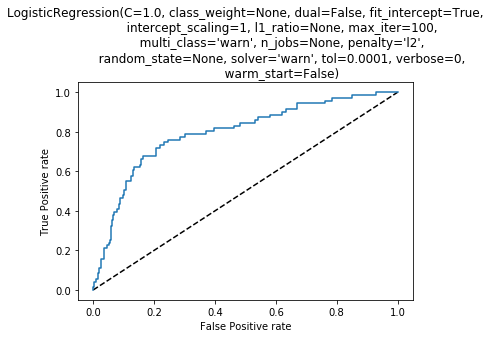

roc_score= 0.6962858230463864


In [38]:
roc(lr)

Decision tree Classifier

In [39]:
#lets check for decision tree
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
random(dtc)

0.8151515151515152 at 92


In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=92)
model(dtc)

score= 1.0
0.8090909090909091
[[217  35]
 [ 28  50]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       252
           1       0.59      0.64      0.61        78

    accuracy                           0.81       330
   macro avg       0.74      0.75      0.74       330
weighted avg       0.82      0.81      0.81       330



In [41]:
cross_val(dtc)

[0.78606965 0.75124378 0.76       0.79899497 0.8241206 ]
mean_score= 0.7840858021450536
standard deviation 0.02641109078795998


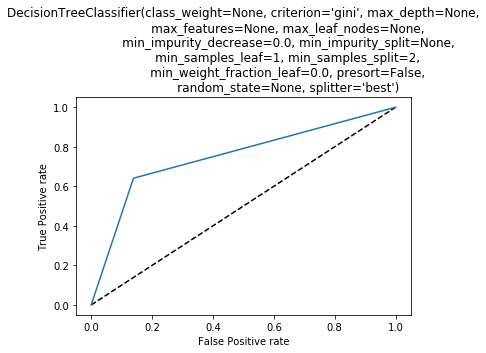

roc_score= 0.7510683760683761


In [42]:
roc(dtc)

naive_Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
random(gnb)

0.7636363636363637 at 96


In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=96)
model(gnb)

score= 0.7597014925373134
0.7636363636363637
[[208  38]
 [ 40  44]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       246
           1       0.54      0.52      0.53        84

    accuracy                           0.76       330
   macro avg       0.69      0.68      0.69       330
weighted avg       0.76      0.76      0.76       330



In [45]:
cross_val(gnb)

[0.76616915 0.68159204 0.65       0.73366834 0.7638191 ]
mean_score= 0.719049726243156
standard deviation 0.046063399356342155


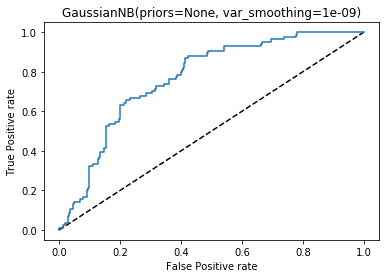

roc_score= 0.6846689895470383


In [46]:
roc(gnb)

K-neighbors

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

#using gridsearch to detrmine best neighbor
parameters={'n_neighbors':range(1,40)}
grid=GridSearchCV(knn,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'n_neighbors': 17}

In [48]:
knn=KNeighborsClassifier(n_neighbors=17)
random(knn)

0.7878787878787878 at 77


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=77)
model(knn)

score= 0.735820895522388
0.7878787878787878
[[259   3]
 [ 67   1]]
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       262
           1       0.25      0.01      0.03        68

    accuracy                           0.79       330
   macro avg       0.52      0.50      0.45       330
weighted avg       0.68      0.79      0.71       330



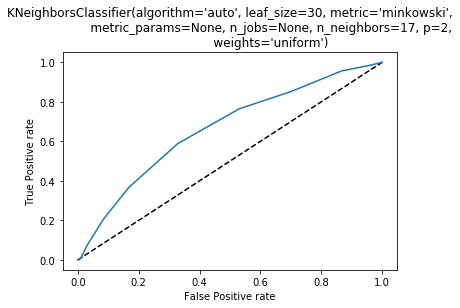

roc_score= 0.501627750336776


In [50]:
roc(knn)

Support Vector machine

In [51]:
from sklearn.svm import SVC
svm=SVC()

#detrmining proper kernel to use
parameters={'kernel':['rbf','linear'],'C':[1,10,100]}
grid=GridSearchCV(svm,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [52]:
svm=SVC(kernel='linear',probability=True)
random(svm)

0.8333333333333334 at 97


In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=97)
model(svm)

score= 0.8
0.8333333333333334
[[227  31]
 [ 24  48]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       258
           1       0.61      0.67      0.64        72

    accuracy                           0.83       330
   macro avg       0.76      0.77      0.76       330
weighted avg       0.84      0.83      0.84       330



In [54]:
cross_val(svm)

[0.82587065 0.7960199  0.77       0.81909548 0.75376884]
mean_score= 0.7929509737743443
standard deviation 0.027707922057732995


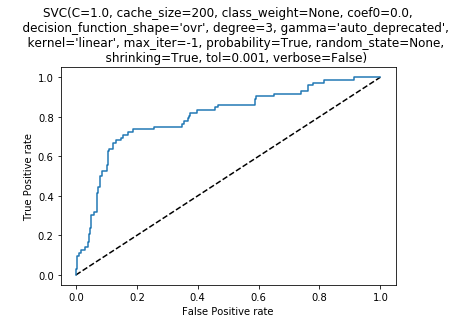

roc_score= 0.7732558139534883


In [55]:
roc(svm)

Ensemble Techniques

Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

#determining best estimators
parameters={'n_estimators':[10,100,500]}
grid=GridSearchCV(rf,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'n_estimators': 10}

In [57]:
rf=RandomForestClassifier(n_estimators=10)
random(rf)

0.8212121212121212 at 77


In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=77)
model(rf)

score= 0.9865671641791045
0.8090909090909091
[[248  14]
 [ 49  19]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       262
           1       0.58      0.28      0.38        68

    accuracy                           0.81       330
   macro avg       0.71      0.61      0.63       330
weighted avg       0.78      0.81      0.78       330



In [59]:
cross_val(rf)

[0.79104478 0.75621891 0.75       0.77889447 0.77386935]
mean_score= 0.7700055001375035
standard deviation 0.015012558074963005


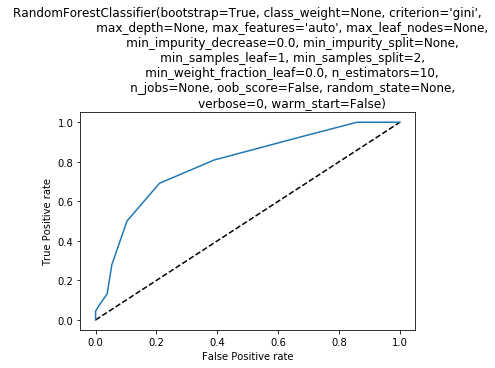

roc_score= 0.6129883251010327


In [60]:
roc(rf)

Gradient Boosting classifier

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

#determing best parameters
parameters={'learning_rate':[1,0.1,0.01,0.001],'n_estimators':[10,100,500]}
grid=GridSearchCV(gbc,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [62]:
gbc=GradientBoostingClassifier(learning_rate=0.01,n_estimators=500)
random(gbc)

0.8575757575757575 at 97


In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=97)
model(gbc)

score= 0.9507462686567164
0.8575757575757575
[[232  26]
 [ 21  51]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       258
           1       0.66      0.71      0.68        72

    accuracy                           0.86       330
   macro avg       0.79      0.80      0.80       330
weighted avg       0.86      0.86      0.86       330



From all the above algorithms,we get best accuracy score from Gradient Boosting Classifier with a score of 0.85 at random_state of 97.So taking it as a final algorithm,Lets solve for it one more time

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=97)
model(gbc)

score= 0.9537313432835821
0.8575757575757575
[[232  26]
 [ 21  51]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       258
           1       0.66      0.71      0.68        72

    accuracy                           0.86       330
   macro avg       0.79      0.80      0.80       330
weighted avg       0.86      0.86      0.86       330



In [65]:
cross_val(gbc)

[0.8159204  0.81094527 0.8        0.83919598 0.85929648]
mean_score= 0.8250716267906698
standard deviation 0.021366906209105377


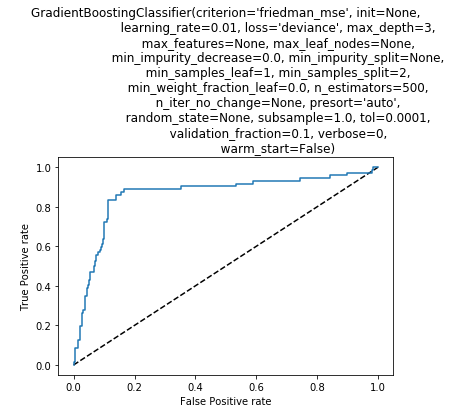

roc_score= 0.803779069767442


In [66]:
roc(gbc)

In [67]:
#saving the model
from sklearn.externals import joblib
joblib.dump(gbc,'gbc_insurance_fraud.pkl')

['gbc_insurance_fraud.pkl']

## Conclusion

In this project,I import the data from folder files and check for the value counts in each column.Most of the columns are in object datatype,so convert them to labels using labelencoder.Extracting date from date showing columns.Dropped some of the unnecessary columns.After that,i get the data insights using various plots b/w the diffrent features in the dataset.Checked for the statistical summary and plots correlation using heatmap.AFter this complete data preprocessing,I shaped the data for machine learning and applied standaed scalar in input variables to scale the data.By checking for various algorithms solved above,I get the best fit algorithm as a Gradient Boosting Classifier. 